### Numpy basics

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [7]:
m = np.arange(12).reshape((3,4))
row = len(m)
column = len(m[0])
mean = np.mean(m)
print("rows:",row, "columns:",column, "means:",mean)


rows: 3 columns: 4 means: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [30]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#Outer function
print(np.outer(u,v)) 
#print(np.multiply.outer(u.ravel(), v.ravel()))

#Numpy broadcasting
print(u.reshape(-1,1) * v.reshape(1,-1))

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [47]:
mat = np.random.rand(10,6)
np.any(mat)
mat[mat<=0.1]=0
mat

array([[0.2656801 , 0.22336989, 0.19088868, 0.54634714, 0.10298402,
        0.32857912],
       [0.        , 0.52160584, 0.68505425, 0.80569958, 0.87194923,
        0.96206328],
       [0.86119352, 0.35919895, 0.57188318, 0.91716553, 0.18428891,
        0.42756435],
       [0.74600774, 0.66192874, 0.        , 0.41688807, 0.2225265 ,
        0.3305806 ],
       [0.        , 0.44386922, 0.80085555, 0.45625645, 0.6578352 ,
        0.33240106],
       [0.        , 0.53503524, 0.        , 0.        , 0.60348478,
        0.87421807],
       [0.55936843, 0.83659594, 0.        , 0.21829275, 0.37211111,
        0.87224793],
       [0.16535677, 0.        , 0.66960642, 0.        , 0.17954197,
        0.12017751],
       [0.69233858, 0.46121323, 0.58386317, 0.47646104, 0.92442827,
        0.        ],
       [0.26404219, 0.38161694, 0.53631003, 0.36082192, 0.13547688,
        0.93932713]])

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Main Array: [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505

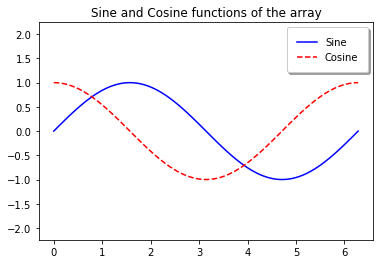

In [20]:
x = np.linspace(0, 2 * np.pi, 100)
print("Main Array:",x)


x_10 = x[0::10]
print("Every 10th element using slice notation, including the first element:",x_10)


x_rev = x[::-1]
print("Reversed main array:",x_rev)


x_sin = np.sin(x)
x_cos = np.cos(x)
x_sin_cos = abs(x_sin-x_cos)
print("Extracted sine and cosine funcitons with values < 0.1:",x_sin_cos[x_sin_cos<0.1])


#plt.plot(x, x_sin)
#plt.plot(x, x_cos)
fig, ax = plt.subplots()
ax.plot(x, x_sin, '-b', label='Sine')
ax.plot(x, x_cos, '--r', label='Cosine')
ax.axis('equal')
plt.title('Sine and Cosine functions of the array')
leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [34]:
x = range(1,11)
n = range(1,11)
multiplication_table = [[i*j for j in x] for i in n]
print("multiplication_table is:",multiplication_table)


print("trace of matrix is:",np.trace(multiplication_table))


#print("Diagonal of matrix is:",np.diag(multiplication_table))


print("Anti-diagonal of matrix is:",np.fliplr(multiplication_table).diagonal())


i, j = 1, 2
print("diagonal of matrix offset by 1 upwards is:",np.diagonal(multiplication_table, offset=(j - i)))

multiplication_table is: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [3, 6, 9, 12, 15, 18, 21, 24, 27, 30], [4, 8, 12, 16, 20, 24, 28, 32, 36, 40], [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], [6, 12, 18, 24, 30, 36, 42, 48, 54, 60], [7, 14, 21, 28, 35, 42, 49, 56, 63, 70], [8, 16, 24, 32, 40, 48, 56, 64, 72, 80], [9, 18, 27, 36, 45, 54, 63, 72, 81, 90], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]
trace of matrix is: 385
Anti-diagonal of matrix is: [10 18 24 28 30 30 28 24 18 10]
diagonal of matrix offset by 1 upwards is: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [40]:
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_miles = np.abs(positions - positions[:, np.newaxis])
print("Distance in Miles",distance_miles)
distance_km = distance_miles*1.60934
print("Distance in Kilometers",distance_km)

Distance in Miles [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
Distance in Kilometers [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.30226 130

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [66]:
import math
prime = []
 
def simpleSieve(limit):
     
    mark = [True for i in range(limit + 1)]
    p = 2
    while (p * p <= limit):
         
        if (mark[p] == True): 
             
            for i in range(p * p, limit + 1, p): 
                mark[i] = False 
        p += 1
    
    for p in range(2, limit): 
        if mark[p]:
            prime.append(p)
            print(p,end = " ")
             
def segmentedSieve(n):
     
    limit = int(math.floor(math.sqrt(n)) + 1)
    simpleSieve(limit)
     
    low = limit
    high = limit * 2
    
    while low < n:
        if high >= n:
            high = n
             
        mark = [True for i in range(limit + 1)]
         
        for i in range(len(prime)):
             
            loLim = int(math.floor(low / prime[i]) *
                                         prime[i])
            if loLim < low:
                loLim += prime[i]
                 
            for j in range(loLim, high, prime[i]):
                mark[j - low] = False
                 
        for i in range(low, high):
            if mark[i - low]:
                print(i, end = " ")
                 
        low = low + limit
        high = high + limit
        
import timeit
starttime = timeit.default_timer()
#print("The start time is :",starttime)
n = 99
segmentedSieve(n)
print("Primes smaller than", n, ":")
print("The time taken for n = 99 is :", timeit.default_timer() - starttime)

starttime = timeit.default_timer()
#print("The start time is :",starttime)
n = 100
segmentedSieve(n)
print("Primes smaller than", n, ":")
print("The time taken for n = 100 is :", timeit.default_timer() - starttime)

starttime = timeit.default_timer()
#print("The start time is :",starttime)
n = 110
segmentedSieve(n)
print("Primes smaller than", n, ":")
print("The time taken for n = 110 is :", timeit.default_timer() - starttime)

print("With increase in the value of n, timeit also increases")

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 Primes smaller than 99 :
The time taken for n = 99 is : 0.0004840000001422595
2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 Primes smaller than 100 :
The time taken for n = 100 is : 0.0022417999998651794
2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 Primes smaller than 110 :
The time taken for n = 110 is : 0.0025658000004114


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

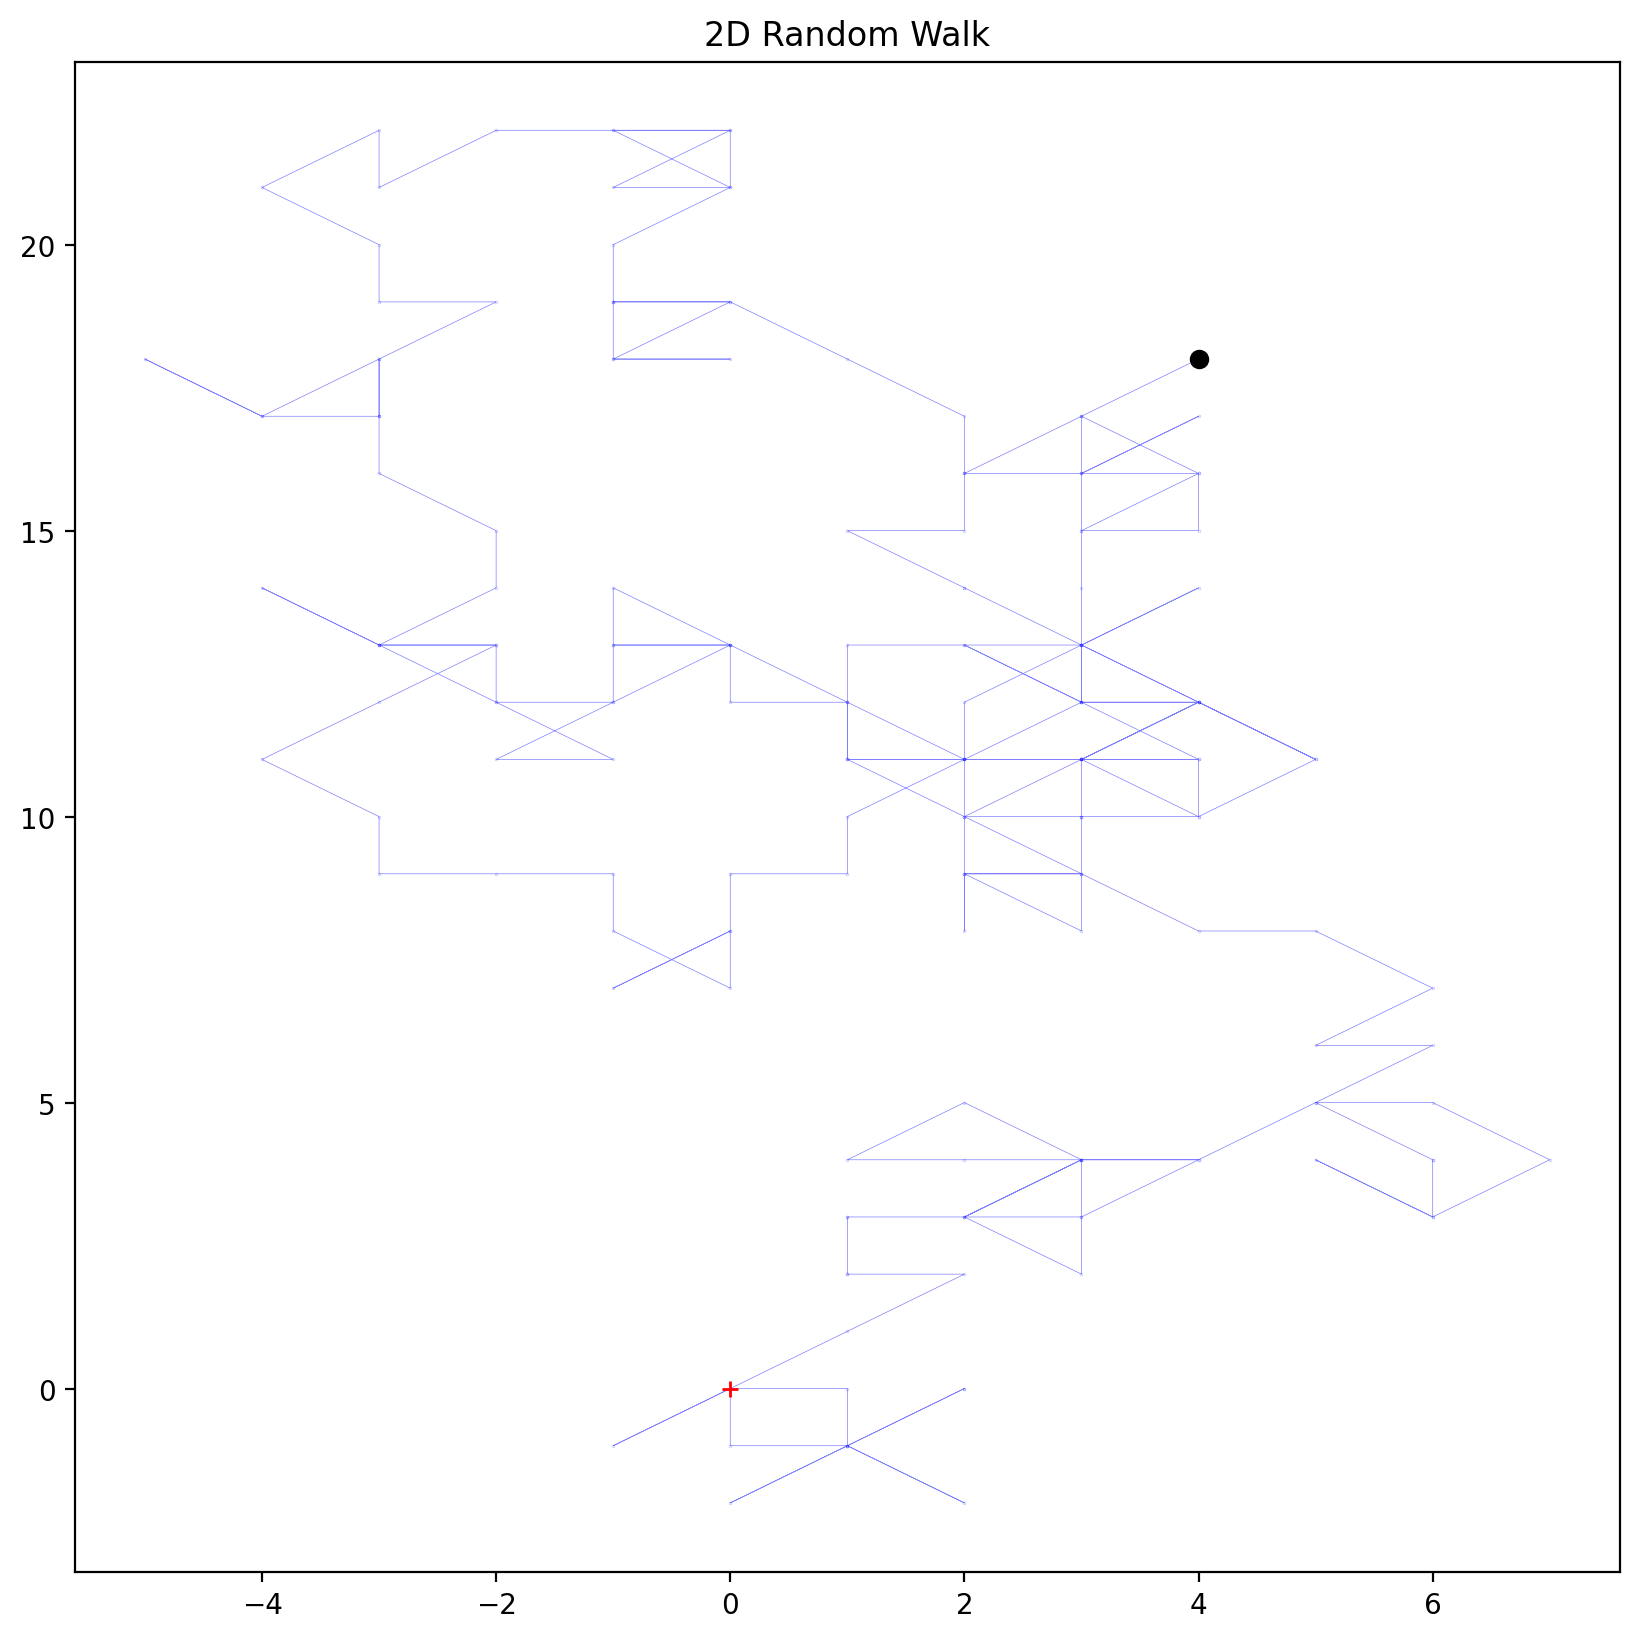

In [82]:
# Define parameters for the walk
dims = 2
step_n = 200
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)

#dist_square = path**path
#np.mean(dist_square, axis = 1)
#plt.plot(steps, path[:200,])

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Mean: 24639.404761904763
Standard Deviation: 20329.69574416827
Correlation coefficient: [[1.         0.94670427 0.7453805  0.53293502 0.23921421 0.41895709
  0.85283015 0.95425832 0.98051108 0.99070716 0.99590369 0.97244531
  0.84380146 0.66804435 0.48273748 0.22820667 0.51948972 0.76705229
  0.92150249 0.93778113 0.98615283]
 [0.94670427 1.         0.92035994 0.75318636 0.25497852 0.32466216
  0.7268982  0.84872675 0.87731729 0.92518284 0.92808384 0.99390766
  0.96975686 0.86859965 0.61251621 0.14170298 0.34950737 0.55218411
  0.76071409 0.79411842 0.89353024]
 [0.7453805  0.92035994 1.         0.91513143 0.24657749 0.17178696
  0.47353001 0.60050099 0.62656117 0.71336987 0.71256608 0.8769956
  0.98343945 0.9878796  0.68863405 0.02532081 0.0997558  0.21500902
  0.45744126 0.50695133 0.65319893]
 [0.53293502 0.75318636 0.91513143 1.         0.53083474 0.3557259
  0.42049082 0.46280139 0.44086265 0.5425812  0.52243784 0.71149286
  0.88706676 0.96607034 0.8831206  0.27116487 0.18923759 0

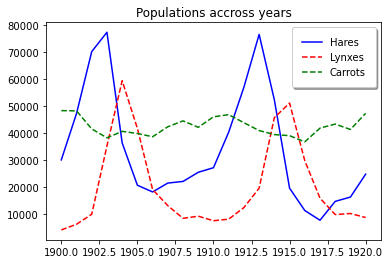

In [58]:
pop = np.loadtxt("populations.txt")
#print(pop)
#type(pop)
years = pop[:,0]
hares = pop[:,1]
lynxes = pop[:,2]
carrots = pop[:,3]

fig, ax = plt.subplots()
ax.plot(years, hares, '-b', label='Hares')
ax.plot(years, lynxes, '--r', label='Lynxes')
ax.plot(years, carrots, '--g', label='Carrots')
plt.title('Populations accross years')
leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

print("Mean:",np.mean(pop))
print("Standard Deviation:",np.std(pop))
print("Correlation coefficient:",np.corrcoef(pop))

In [57]:
#np.amax(pop, axis=1)

In [56]:
pop2 = pd.read_csv("populations.txt", sep="\t")
#print(pop2)
#arr = np.argsort(-pop2.values, axis=1)
#df1 = pd.DataFrame(pop2.columns[arr], index=pop2.index)
#print (df1)
b = pop2.idxmax(axis=1)
pop2['highest_population'] = b
print(pop2)

    # year     hare     lynx  carrot highest_population
0     1900  30000.0   4000.0   48300             carrot
1     1901  47200.0   6100.0   48200             carrot
2     1902  70200.0   9800.0   41500               hare
3     1903  77400.0  35200.0   38200               hare
4     1904  36300.0  59400.0   40600               lynx
5     1905  20600.0  41700.0   39800               lynx
6     1906  18100.0  19000.0   38600             carrot
7     1907  21400.0  13000.0   42300             carrot
8     1908  22000.0   8300.0   44500             carrot
9     1909  25400.0   9100.0   42100             carrot
10    1910  27100.0   7400.0   46000             carrot
11    1911  40300.0   8000.0   46800             carrot
12    1912  57000.0  12300.0   43800               hare
13    1913  76600.0  19500.0   40900               hare
14    1914  52300.0  45700.0   39400               hare
15    1915  19500.0  51100.0   39000               lynx
16    1916  11200.0  29700.0   36700            